In [1]:
import os
import cv2
os.path.expanduser('~/.keras/models')
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
model = ResNet152(weights='imagenet')

In [3]:
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [4]:
img = image.load_img('image.jpeg', target_size=(224, 224))

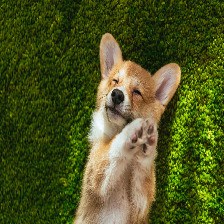

In [5]:
img

In [6]:
X = image.img_to_array(img)

In [7]:
X

array([[[32., 44.,  4.],
        [22., 39.,  5.],
        [55., 87.,  4.],
        ...,
        [16., 28.,  6.],
        [13., 24.,  8.],
        [27., 50.,  8.]],

       [[37., 48., 16.],
        [38., 58.,  9.],
        [73., 90., 10.],
        ...,
        [14., 32.,  8.],
        [28., 49.,  8.],
        [16., 41.,  1.]],

       [[35., 47.,  7.],
        [29., 47.,  7.],
        [27., 43.,  6.],
        ...,
        [18., 43.,  3.],
        [43., 74.,  0.],
        [53., 84.,  8.]],

       ...,

       [[27., 38.,  6.],
        [45., 67.,  5.],
        [51., 76.,  0.],
        ...,
        [40., 48.,  1.],
        [27., 41.,  8.],
        [23., 36., 10.]],

       [[37., 51.,  0.],
        [38., 60.,  0.],
        [46., 68.,  4.],
        ...,
        [62., 67.,  3.],
        [57., 68.,  8.],
        [24., 39.,  0.]],

       [[47., 63.,  1.],
        [38., 58.,  9.],
        [19., 36.,  0.],
        ...,
        [31., 45.,  0.],
        [35., 61.,  0.],
        [39., 58.,  0.]]

In [8]:
X = np.expand_dims(X, axis=0)

In [9]:
X

array([[[[32., 44.,  4.],
         [22., 39.,  5.],
         [55., 87.,  4.],
         ...,
         [16., 28.,  6.],
         [13., 24.,  8.],
         [27., 50.,  8.]],

        [[37., 48., 16.],
         [38., 58.,  9.],
         [73., 90., 10.],
         ...,
         [14., 32.,  8.],
         [28., 49.,  8.],
         [16., 41.,  1.]],

        [[35., 47.,  7.],
         [29., 47.,  7.],
         [27., 43.,  6.],
         ...,
         [18., 43.,  3.],
         [43., 74.,  0.],
         [53., 84.,  8.]],

        ...,

        [[27., 38.,  6.],
         [45., 67.,  5.],
         [51., 76.,  0.],
         ...,
         [40., 48.,  1.],
         [27., 41.,  8.],
         [23., 36., 10.]],

        [[37., 51.,  0.],
         [38., 60.,  0.],
         [46., 68.,  4.],
         ...,
         [62., 67.,  3.],
         [57., 68.,  8.],
         [24., 39.,  0.]],

        [[47., 63.,  1.],
         [38., 58.,  9.],
         [19., 36.,  0.],
         ...,
         [31., 45.,  0.],
        

In [10]:
np.shape(X)

(1, 224, 224, 3)

In [11]:
X = preprocess_input(X)

In [12]:
X

array([[[[ -99.939,  -72.779,  -91.68 ],
         [ -98.939,  -77.779, -101.68 ],
         [ -99.939,  -29.779,  -68.68 ],
         ...,
         [ -97.939,  -88.779, -107.68 ],
         [ -95.939,  -92.779, -110.68 ],
         [ -95.939,  -66.779,  -96.68 ]],

        [[ -87.939,  -68.779,  -86.68 ],
         [ -94.939,  -58.779,  -85.68 ],
         [ -93.939,  -26.779,  -50.68 ],
         ...,
         [ -95.939,  -84.779, -109.68 ],
         [ -95.939,  -67.779,  -95.68 ],
         [-102.939,  -75.779, -107.68 ]],

        [[ -96.939,  -69.779,  -88.68 ],
         [ -96.939,  -69.779,  -94.68 ],
         [ -97.939,  -73.779,  -96.68 ],
         ...,
         [-100.939,  -73.779, -105.68 ],
         [-103.939,  -42.779,  -80.68 ],
         [ -95.939,  -32.779,  -70.68 ]],

        ...,

        [[ -97.939,  -78.779,  -96.68 ],
         [ -98.939,  -49.779,  -78.68 ],
         [-103.939,  -40.779,  -72.68 ],
         ...,
         [-102.939,  -68.779,  -83.68 ],
         [ -95.939,  -

In [13]:
predictions = model.predict(X)

1/1 [==============================] - 6s 6s/step


In [14]:
predictions

array([[2.16592707e-06, 3.96034864e-07, 1.50094603e-08, 1.30316202e-08,
        2.36924631e-08, 5.19471814e-06, 9.24239316e-08, 4.74297281e-07,
        1.98885732e-06, 2.80880431e-06, 4.89532340e-07, 1.47475498e-06,
        4.56466438e-08, 1.98547568e-07, 1.25433637e-08, 3.17141797e-08,
        3.71541660e-08, 6.30963228e-08, 1.08396330e-06, 1.85649654e-07,
        1.06470600e-06, 2.28743016e-08, 2.72907759e-08, 1.58764828e-06,
        5.97790120e-07, 1.60853588e-07, 2.26383051e-07, 1.74476398e-07,
        4.62096750e-07, 4.07384590e-07, 2.32096610e-07, 5.49616834e-06,
        2.60246935e-07, 1.78393023e-09, 2.70993638e-07, 1.27956696e-07,
        9.91514923e-08, 4.89016081e-08, 1.56982296e-07, 2.54142307e-08,
        7.52438882e-06, 1.86675404e-08, 1.44424931e-07, 3.59241277e-08,
        8.44251247e-08, 6.58404673e-08, 1.32128189e-05, 1.98854377e-05,
        6.26870067e-09, 5.77971591e-08, 1.33799205e-07, 9.82935603e-07,
        7.33980016e-07, 3.15109219e-08, 5.44982548e-08, 2.287317

In [15]:
decode_predictions(predictions, top=3)

[[('n02113023', 'Pembroke', 0.8599719),
  ('n02325366', 'wood_rabbit', 0.06444415),
  ('n02326432', 'hare', 0.03008061)]]

In [16]:
capture = cv2.VideoCapture(0)
capture.release()
cv2.destroyAllWindows()

In [17]:
capture = cv2.VideoCapture(0)
while True:
    ret, frame = capture.read()
    frame = cv2.resize(frame, (224, 224))
    image = frame[...,::-1]
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    predictions = model.predict(image)
    name = decode_predictions(predictions, top=1)[0][0][1]
    cv2.putText(frame, name, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0))
    cv2.imshow('webcam', frame)
    if cv2.waitKey(1) == 13:
        break;
capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 297ms/step
